In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [3]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

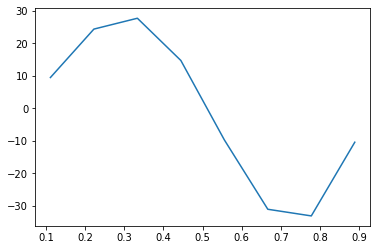

In [4]:
#create our function
u = lambda x: np.sin((x + np.pi)**2 - 1)

#define the step size and grid
h = 1/10
xs = np.linspace(0,1,10)

#create the diagonal matrix for the first derivative
diag1 = np.diag(np.ones(7), k=1)
diag2 = np.diag(np.ones(7)*-1, k=-1)
zero_mat = np.zeros((8,8))

up_diag = diag1 + diag2 + zero_mat
up_diag = (1/(2*h)) * up_diag

#create the vectors needed for the first derivative
up_vec1 = u(xs[1:-1])
up_vec2 = np.zeros(8)
up_vec2[0], up_vec2[-1] = -u(xs[0]) / (2*h), u(xs[-1]) / (2*h)

#approximate the first derivative
ups = up_diag@up_vec1 + up_vec2

#create the diagonal matrix needed for the second derivative
diag3 = np.diag(np.ones(8)*-2)
diag4 = np.diag(np.ones(7), k=1)
diag5 = np.diag(np.ones(7),k=-1)

udp_diag = diag3 + diag4 + diag5
udp_diag = (1/(h**2)) * udp_diag

udp_vec = np.zeros(8)

udp_vec[0], udp_vec[-1] = u(xs[0]) / (h**2), u(xs[-1]) / (h**2)

#approximate the second derivative
udps = udp_diag@up_vec1 + udp_vec

#approximate the derivative of the function
approx = 1/2*udps - ups

plt.plot(xs[1:-1], approx)
plt.show()

# Problem 2

Equation (1.7) is the singularly perturbed boundary value problem
\begin{align*}
	&{ } \varepsilon u''(x)-u(x)'= f(x), \quad x \in (0,1), \\
	&{ } u(0) = \alpha, \quad u(1) = \beta.
\end{align*}

Use equation (1.9) to solve the singularly perturbed BVP (1.7) on $[0,1]$ with $\varepsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\varepsilon$. For $\varepsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

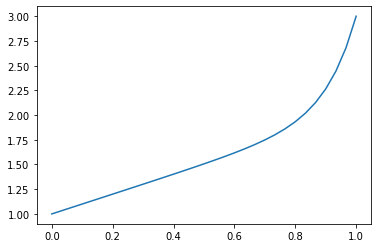

In [5]:
#define our function and all of our variables
eps = 1/10
f = lambda x: -1
a = 1
b = 3
n = 30
xs = np.linspace(0,1,n+1)
h = 1/n

#create our diagonal matrix
diag1 = np.diag(np.ones(n-1)*-2*eps)
diag2 = np.diag(np.ones(n-2)*(eps-h/2), k=1)
diag3 = np.diag(np.ones(n-2)*(eps+h/2), k=-1)
fin_diag = (diag1 + diag2 + diag3) * 1/h**2

#create the necessary vectors
f_vec = np.ones(29)*-1
f_vec[0], f_vec[-1] = f_vec[0] - a*(eps + h/2)/h**2, f_vec[-1] - b*(eps - h/2)/h**2

#solve the system of equations and add the boundary conditions
almost_soln = la.solve(fin_diag, f_vec)
fin_soln = np.concatenate(([a], almost_soln, [b]))

plt.plot(xs, fin_soln)
plt.show()


# Problem 3

Implement a function `singular_bvp` to compute the finite difference solution to (1.7).
Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.
Use these to visualize the $\mathcal{O}(h^2)$ convergence of the finite difference method from Problem 2 by producing a loglog plot of error against subinterval count; this will be similar to Figure 2, except with $\varepsilon=0.1$. 

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. ote that, since the ratios of numbers of subintervals between approximations are multiples of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation; the vector has length 5*2^9+1
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals; the vector has length 5*2^j+1
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error; slicing results in a vector of length 5*2^j+1,
    #    which allows it to be compared
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


In [6]:
def singular_bvp(eps,alpha,beta,f,n):
    """
    Solves the singularly perturbed BVP (1.7) on the interval [0,1] using finite differences.
    
    Parameters:
        eps (float): the singular perturbation parameter of the BVP.
        alpha (float): the boundary value of u at x=0.
        beta (float): the boundary value of u at x=1.
        f (callable): the right-hand function of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points.
    """
    #define our function and all of our variables
    eps = eps
    f = f
    a = alpha
    b = beta
    n = n
    xs = np.linspace(0,1,n+1)
    h = 1/n

    #create our diagonal matrix
    diag1 = np.diag(np.ones(n-1)*-2*eps)
    diag2 = np.diag(np.ones(n-2)*(eps-h/2), k=1)
    diag3 = np.diag(np.ones(n-2)*(eps+h/2), k=-1)
    fin_diag = (diag1 + diag2 + diag3) * 1/h**2

    #create the necessary vectors
    f_vec = np.ones(n-1)*-1
    f_vec[0], f_vec[-1] = f_vec[0] - a*(eps + h/2)/h**2, f_vec[-1] - b*(eps - h/2)/h**2

    #solve the system of equations and add the boundary conditions
    almost_soln = la.solve(fin_diag, f_vec)
    fin_soln = np.concatenate(([a], almost_soln, [b]))
    
    return fin_soln

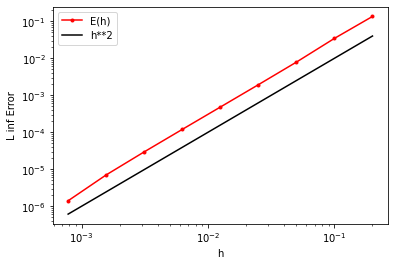

In [8]:
#define our function and variables
eps = 1/10
alpha = 1
beta = 3
f = lambda x: -1

#define our number of subintervals and find the "true" solution
ns = 5*np.array([2**j for j in range(10)])
h, max_errors = (1)/ns[:-1], np.ones(9)
num_sol_best = singular_bvp(eps,alpha,beta,f,ns[-1])

#calculate the max error for each scenario
for j in range(9):
    sol_approx = singular_bvp(eps,alpha,beta,f,ns[j])
    max_errors[j] = np.max(np.abs(sol_approx-num_sol_best[::2**(9-j)]))

#plot
plt.loglog(h,max_errors,'.-r', label='E(h)')
plt.loglog(h,h**2, color='black', label='h**2')
plt.xlabel('h')
plt.ylabel('L inf Error')
plt.legend()
plt.show()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y''(x) +a_2(x)y'(x)+ a_3(x) y(x) = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) - 4(\pi - x^2)y(x) = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\varepsilon = 0.1$ on a grid with $n=30$ subintervals. Plot your solution.

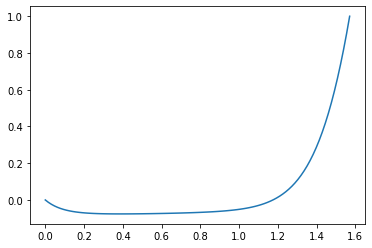

In [38]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """
    Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
    using finite differences.
    
    Parameters:
        a, b (float): the left and right boundary points.
        alpha (float): the boundary value of y at x=a.
        beta (float): the boundary value of y at x=b.
        f (callable): the right-hand function of the BVP.
        a1, a2, a3 (callable): the coefficient functions of the BVP.
        n (int): the number of subintervals to use in the finite differences method.
        
    Returns:
        ((n+1,) ndarray): the approximated solution to the BVP, including the boundary points."""
    #create our step size and xs
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    
    #construct our diagonal matrix
    diag_1 = np.diag(h**2*a3(x[1:-1]) - 2*a1(x[1:-1]))
    diag_2 = np.diag(a1(x[2:-1]) - (h/2)*a2(x[2:-1]), k=-1)
    diag_3 = np.diag(a1(x[1:-2]) + (h/2)*a2(x[1:-2]),k=1)
    full_diag = diag_1 + diag_2 + diag_3
    
    #construct the vector on the right hand side of equation
    syst_vec = np.array([f(x[1])-alpha*(a1(x[1]) - (h/2)*a2(x[1]))/h**2] + [f(i) for i in x[2:-2]] + [f(x[-2])-beta*(a1(x[-2]) + (h/2)*a2(x[-2]))/h**2])
    
    #solve the equation and and in the endpoints
    return np.concatenate(([alpha], la.solve((1/h**2)*full_diag, syst_vec), [beta]))


#solve the given bvp and plot the solution
a, b, epsilon, alpha, beta, n= 0, np.pi/2, .1, 0, 1, 100
x = np.linspace(a, b, n+1)
a1 = lambda x: epsilon*np.ones_like(x)
a2 = lambda x: np.zeros_like(x)
a3 = lambda x: -4*(np.pi-x**2)
f = lambda x: np.cos(x)
approx = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
plt.plot(x, approx)
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\varepsilon y''(x) + xy'(x) = -\varepsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\varepsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals. Plot your solutions.

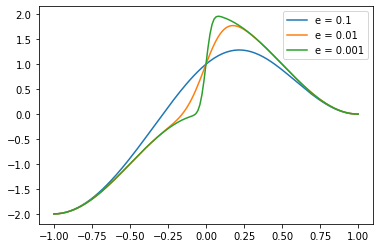

In [39]:
#define our epsilons and other parameters
eps = [.1, .01, .001]
n = 150
a = -1
b = 1
alpha = -2
beta = 0
#define our xs
x = np.linspace(a, b, n+1)

#define the functional 'coefficients'
a2 = lambda x: x
a3 = lambda x: np.zeros_like(x)

#solve the bvp for each epsilon value
for ep in eps:
    a1 = lambda x: ep*np.ones_like(x)
    f = lambda x: -ep*(np.pi**2)*np.cos(np.pi*x) - np.pi*x*np.sin(np.pi*x)
    approx = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
    plt.plot(x, approx, label= "e = "+str(ep))

#plot and display
plt.legend()
plt.show()
    

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\varepsilon +x^2)y''(x) + 4xy'(x) + 2y(x) = 0, \\
	y(-1) = 1/(1+\varepsilon), \quad y(1) = 1/(1+\varepsilon),
\end{align*}

for $\epsilon = 0.05$ and $0.02$. Use a grid with $n=150$ subintervals. Plot your solutions.

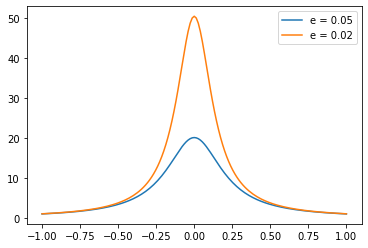

In [36]:
#define our epsilons and other parameters
eps = [.05, .02]
n = 150
a = -1
b = 1
#define our xs
x = np.linspace(a, b, n+1)

#define our functional coefficients and f 
a2 = lambda x: 4*x
a3 = lambda x: 2*np.ones_like(x)
f = lambda x: np.zeros_like(x)

#solve the bvp for each epsilon value
for ep in eps:
    a1 = lambda x: ep + x**2
    alpha = 1/(1+ep)
    beta = 1/(1+ep)
    approx = bvp(a,b,alpha,beta,a1,a2,a3,f,n)
    plt.plot(x, approx, label= "e = "+str(ep))

#plot and display
plt.legend()
plt.show()